  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

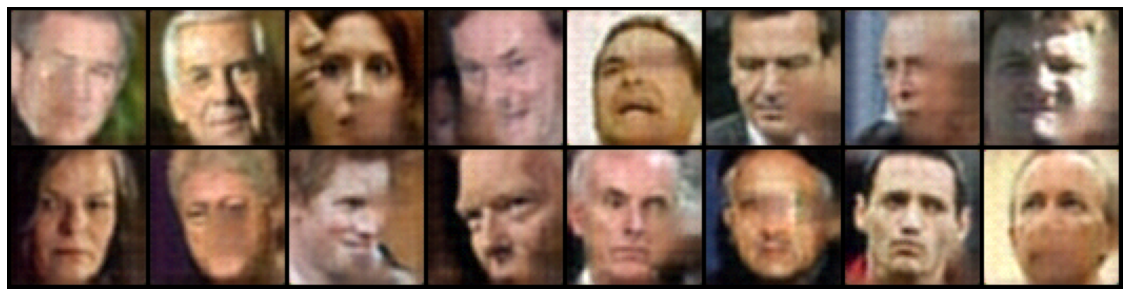

In [3]:
from impaintingLib import *
from torch.utils.tensorboard import SummaryWriter

### Visualization :
# - plot_all_img 
# - plot_last_img
# - board_plot_last

### Alteration :
# - squareMask

# -------------- Parameters

trainloader, testloader = getFaces()

runName   = "AutoEncodeEpo10"
model     = AutoEncoder().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.001)
criterion = torch.nn.L1Loss()

# -------------- Process

# Train
alterFunc = Alter(min_cut=4, max_cut=60).squareMask
visuFunc  = None
train(model, optimizer, trainloader, criterion, epochs=10, alter=alterFunc, visu=visuFunc, runName=runName)

# Test
alterFunc = alterFunc
visuFunc  = Visu(runName = runName, save=False).plot_last_img
test(model, testloader, alter=alterFunc, visu=visuFunc)

# -------------- Display

# Tensor Board Model
writer = SummaryWriter("runs/" + runName)
example_input, _ = next(iter(trainloader))
writer.add_graph(model,example_input.cuda())
writer.close()